In [4]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


# Question 1: Use yfinance to Extract Stock Data


In [5]:
# Import the yfinance library
import yfinance as yf

# Extract Tesla stock data
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")  # Retrieve maximum historical data

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [6]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install selenium


171.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 89.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 50.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

# Set up Selenium WebDriver
driver = webdriver.Chrome(executable_path="path_to_chromedriver")  # Replace with your ChromeDriver path

# Open the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Extract page source
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()  # Close the browser

# Locate the revenue table
table = soup.find("table", {"class": "historical_data_table table"})
if table is None:
    print("Revenue table not found!")
    exit()

# Extract rows
rows = table.find_all("tr")

# Parse the data into a list
tesla_revenue = []
for row in rows[1:]:  # Skip header row
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    tesla_revenue.append({"Date": date, "Revenue": revenue})

# Convert to DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue)

# Clean up Revenue column
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)

# Display the last five rows
print(tesla_revenue_df.tail())


TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [6]:
import yfinance as yf
import pandas as pd

In [7]:
gme_data = yf.download('GME', start='2020-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed


In [8]:
gme_data_reset.to_csv('gme_stock_data.csv', index=False)


NameError: name 'gme_data_reset' is not defined

In [9]:
!pip install requests beautifulsoup4 pandas


570.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [11]:
# URL of the webpage containing GME revenue data
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')


In [12]:
# Find the table containing the revenue data (adjust the selector as needed)
table = soup.find('table', {'class': 'historical_data_table'})

# Create an empty list to store the revenue data
revenue_data = []

# Iterate through the rows of the table
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    if len(columns) > 1:
        # Extract the year and revenue
        year = columns[0].text.strip()
        revenue = columns[1].text.strip()
        revenue_data.append([year, revenue])

# Create a pandas DataFrame from the revenue data
gme_revenue = pd.DataFrame(revenue_data, columns=['Year', 'Revenue'])


AttributeError: 'NoneType' object has no attribute 'find_all'

In [13]:
print(gme_revenue.tail())


NameError: name 'gme_revenue' is not defined

In [14]:
!pip install matplotlib


742.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 117.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 115.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 104.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 16.1 MB/s eta 0:00:00


In [15]:
import yfinance as yf
import matplotlib.pyplot as plt


In [16]:
# Download GME stock data
gme_data = yf.download('GME', start='2020-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed


In [17]:
def make_graph(data, title="GameStop Stock Price"):
    # Plot the stock data (using 'Close' price)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='GME Close Price', color='blue')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # Display the graph
    plt.legend()
    plt.grid(True)
    plt.show()


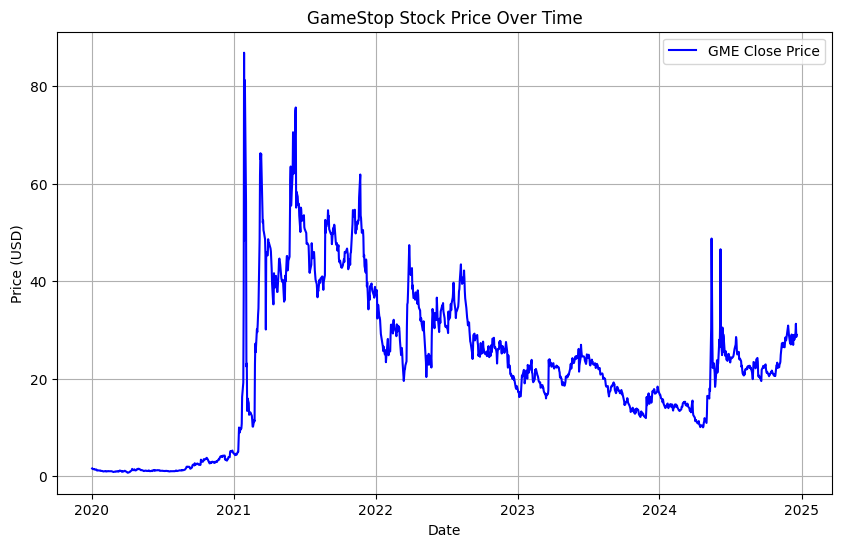

In [18]:
make_graph(gme_data, title="GameStop Stock Price Over Time")


[*********************100%***********************]  1 of 1 completed


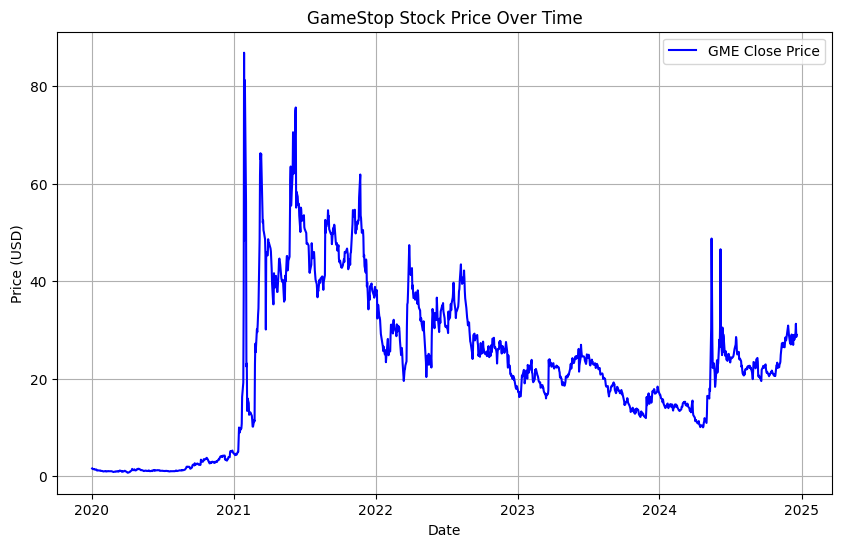

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GME stock data
gme_data = yf.download('GME', start='2020-01-01', end='2024-12-31')

# Define the make_graph function
def make_graph(data, title="GameStop Stock Price"):
    # Plot the stock data (using 'Close' price)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='GME Close Price', color='blue')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # Display the graph
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the graph
make_graph(gme_data, title="GameStop Stock Price Over Time")


In [20]:
!pip install matplotlib


948.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [21]:
import yfinance as yf
import matplotlib.pyplot as plt


In [22]:
# Download TSLA stock data
tsla_data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed


In [23]:
def make_graph(data, title="Tesla Stock Price"):
    # Plot the stock data (using 'Close' price)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='TSLA Close Price', color='green')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # Display the graph
    plt.legend()
    plt.grid(True)
    plt.show()


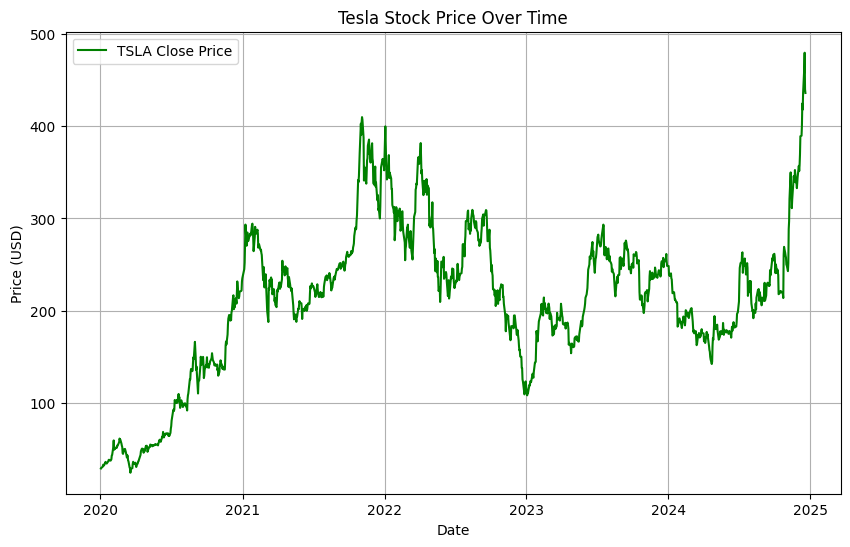

In [24]:
make_graph(tsla_data, title="Tesla Stock Price Over Time")


[*********************100%***********************]  1 of 1 completed


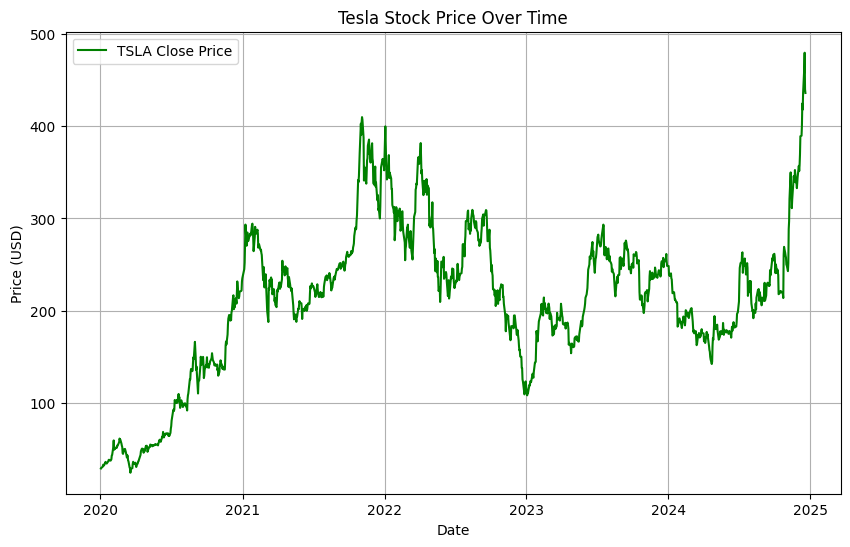

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download TSLA stock data
tsla_data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')

# Define the make_graph function
def make_graph(data, title="Tesla Stock Price"):
    # Plot the stock data (using 'Close' price)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='TSLA Close Price', color='green')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # Display the graph
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the graph
make_graph(tsla_data, title="Tesla Stock Price Over Time")
